## Spring 7: Haciendo preguntas

Usaremos los datos de deporte anteriores para realizar algun ejemplo.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import scipy 
from scipy import stats
import seaborn as sns



In [2]:
archivos=list()
for i in range(31):
    archivos.append("SP1("+str(i)+").csv")
print(archivos)

['SP1(0).csv', 'SP1(1).csv', 'SP1(2).csv', 'SP1(3).csv', 'SP1(4).csv', 'SP1(5).csv', 'SP1(6).csv', 'SP1(7).csv', 'SP1(8).csv', 'SP1(9).csv', 'SP1(10).csv', 'SP1(11).csv', 'SP1(12).csv', 'SP1(13).csv', 'SP1(14).csv', 'SP1(15).csv', 'SP1(16).csv', 'SP1(17).csv', 'SP1(18).csv', 'SP1(19).csv', 'SP1(20).csv', 'SP1(21).csv', 'SP1(22).csv', 'SP1(23).csv', 'SP1(24).csv', 'SP1(25).csv', 'SP1(26).csv', 'SP1(27).csv', 'SP1(28).csv', 'SP1(29).csv', 'SP1(30).csv']


In [3]:
datos_liga=pd.read_csv("./datos/"+archivos[0])

In [4]:
for i in range(1,25):
    temp=pd.read_csv("./datos/"+archivos[i])
    datos_liga=datos_liga.append(temp,ignore_index=True)

Bien , todo lo mismo que en anteriores capitulos. Empezemos directamente con una cuestión y veamos como plantearla.:_¿existe el efecto campo?_  
Ahora plantearemos las hipótesis de forma genérica , y más adelante veremos de hacerlo de forma más _"Data Science"_

H0: _"Jugar como local no tiene efecto en el resultado"_  
H1: _"Jugar como local tiene un efecto en el resultado"_

#### Seleccionando datos

Como venimos haciendo nos olvidamos de toda la sección de apuestas , no nos interesan ni fechas ni horarios, y solo tenemos interés por los resultados finales. con todo ello crearemos un nuevo DataFrame con los campos que nos sean útiles para determinar la validez de la hipótesis.

Creamos dataframe con los campos que nos interesan y cambiamos en nombre de las columnas.

In [5]:
datos_hipotesis=datos_liga[["FTHG","FTAG"]]
datos_hipotesis=datos_hipotesis.rename(columns={"FTHG":"Goles Local","FTAG":"Goles visitante"})

In [6]:
datos_hipotesis.dtypes

Goles Local        int64
Goles visitante    int64
dtype: object

Después creamos dos arrays: el primero con los resultados de las diferencias entre los goles locales menos visitantes , es decir , en positivo cuando gana el local y en negativo cuando gana el visitante.El segundo con la suma de goles totales por partido.

In [7]:
datos_hipotesis["dif_goles"]=datos_liga["FTHG"]-datos_liga["FTAG"]

In [8]:
total_gol=[datos_hipotesis["Goles Local"]+datos_hipotesis["Goles visitante"]]

In [9]:
datos_hipotesis.describe

<bound method NDFrame.describe of       Goles Local  Goles visitante  dif_goles
0               1                0          1
1               1                1          0
2               1                1          0
3               1                4         -3
4               0                0          0
...           ...              ...        ...
9495            5                2          3
9496            1                1          0
9497            1                0          1
9498            4                1          3
9499            3                1          2

[9500 rows x 3 columns]>

Miramos la correlación entre los goles totales y la diferencia de goles con los goles de los equipos cuando son visitante y local.

In [10]:
print("Coeficiente relación entre diferencia de goles y goles del equipo local : "+str(np.corrcoef(datos_hipotesis["dif_goles"],datos_hipotesis["Goles Local"])[0,1]))

Coeficiente relación entre diferencia de goles y goles del equipo local : 0.7811973033873628


In [11]:
print("Coeficiente relación entre diferencia de goles y goles del equipo visitante : "+str(np.corrcoef(datos_hipotesis["dif_goles"],datos_hipotesis["Goles visitante"])[0,1]))

Coeficiente relación entre diferencia de goles y goles del equipo visitante : -0.675901285134082


In [12]:
print("Coeficiente relación entre los goles totales y goles del equipo local : "+str(np.corrcoef(total_gol,datos_hipotesis["Goles Local"])[0,1]))

Coeficiente relación entre los goles totales y goles del equipo local : 0.7445130354363688


In [13]:
print("Coeficiente relación entre los goles totales y goles del equipo visitante : "+str(np.corrcoef(total_gol,datos_hipotesis["Goles visitante"])[0,1]))

Coeficiente relación entre los goles totales y goles del equipo visitante : 0.6154991834105717


## Discusión:
En el hecho de los coeficientes de correlación sean ligeramente mejor para los goles del equipo local vs los goles del equipo visitante , nos podría dar indicios de que la hipótesis H1 tiene una pequeña parte de razón . PERO se podría objetar varios problemas en el tratamiento que hemos hecho de los datos , principalmente nos centraríamos en 2 aspectos:

    1-Las variables de incremeto de goles/goles totales no són independientes de los campos goles local/visitante.
    2-La normalidad de los datos de goles (goles totales) no son demasiado buenas.

Estos aspectos van en contra de los requerimientos para el uso del coeficiente de correlación de Pearson.Por lo tanto quedan en duda cualquier conclusión que se pueda sacar de ellos. Si miramos la distribución del histograma de la diferencia de goles , observamos de forma cualittiva que esta ligeramente desplazada en la parte positiva , lo que podría corroborar la hipotesis H1.
Vemos esta asimetria a la derecha de forma gráfica :

(array([   8.,   48.,  110., 1009., 1518., 4444., 1881.,  308.,  157.,
          17.]),
 array([-8. , -6.4, -4.8, -3.2, -1.6,  0. ,  1.6,  3.2,  4.8,  6.4,  8. ]),
 <BarContainer object of 10 artists>)

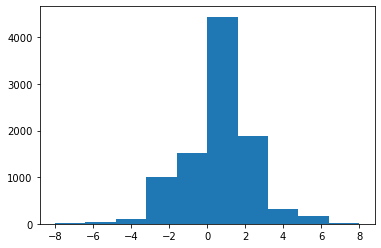

In [14]:

plt.hist(datos_hipotesis["dif_goles"])

Veamoslo más bonito con la libreria seaborn.

c:\Users\anton\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


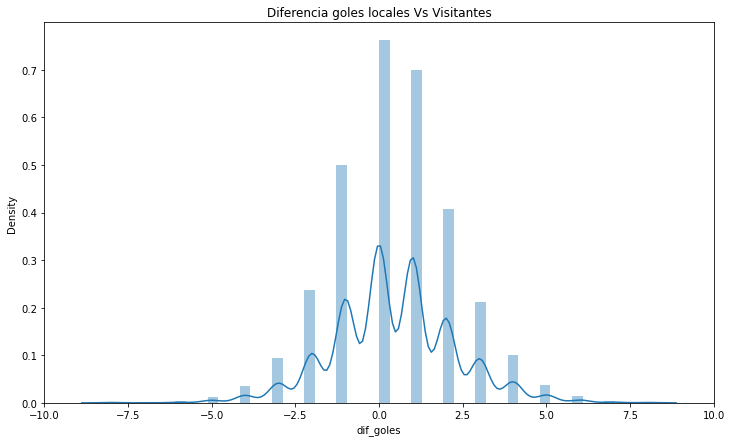

In [15]:
plt.figure(figsize=(12,7))
plt.title("Diferencia goles locales Vs Visitantes")

sns.distplot(datos_hipotesis["dif_goles"])
plt.xlim(-10,10)
plt.show()

Y de forma cuantitativa , a traves del test Skewness:

In [16]:
print(stats.skew(datos_hipotesis["dif_goles"]))

0.07203345144355015



El valor del test Skewness nos da una medidad de la simetria de la distribución, si la distribución fuera normal el valor seria 0. Si es negativa los datos estarían desplazados a la izquierda de la media y si es positiva , como en nuestro caso , los datos estan desplazados a la derecha.
Por lo tanto , confirma nuestras intuiciones.

### Discusión 2: aprovechando los datos.

Asumimos que los datos se acercan a la normalidad lo suficiente para usar herramientas estadísticas , como la t-student para una muestra.
Usando esta herramienta , podemos proceder a reimplementar las hipótesis de una forma más técnica y concreta.

_Hipótesis H0_: no existe factor campo. Si no existe el factor campo la diferencia entre jugar como local o visitante seria nula , si nuestra población sigue una distribución normal , eso significaría que los resultados deberían ser homogéneos y la diferencia de goles entre jugar como local y como visitante deberia ser 0, y por lo tanto la media sería 0.

_Hipótesis H0_:La media de la diferencia de goles entre locales y visitantes es 0.


H1: existe efecto campo . Entonces , por el razonamiento anterior la media debería ser diferente de cero (En nuestro caso si existe efecto equipo local, deberia ser positivo. Pero lo veremos más adelante  ). Por tanto redefinimos H1:

_Hipótesis H1_:La media de la diferencia de goles entre locales y visitantes es diferente de 0.

Ahora cuantifiquemos estas hipotesis:



Primero vemos un resumen estadístico del campo diferencia de goles:

In [17]:
datos_hipotesis["dif_goles"].describe()


count    9500.000000
mean        0.436105
std         1.831237
min        -8.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: dif_goles, dtype: float64

Ahora usaremos las herramientas de la libreria Scipy para calcular los p-values , usando el t test. En este caso en la hipótesis H1 hemos definido que la media es diferente de un valor , usaremos el test de 2 colas , es decir , valores mayores y menores al que ponemos a prueba.


In [18]:
stats.ttest_1samp(datos_hipotesis["dif_goles"],popmean=0)

Ttest_1sampResult(statistic=23.211789043076642, pvalue=5.60955494899423e-116)

Vemos que el valor P-value que nos da el test es << 0.05 , que es el valor de aceptación que hemos decidido. Así podemos rechazar la H0.   
Por ahora bien , parece que todo concuerda. Vamos a hacer otra reinterpretación de hipótesis para comprobarlo.  
Lo ponemos fácil y usaremos el valor de la media que hemos obtenido antes:

_H0_ : La media de la diferencia de goles entre locales y visitantes es >=0.44 .  
_H1_ : La media de la diferencia de goles entre locales y visitantes es < 0.4 .

In [19]:
stats.ttest_1samp(datos_hipotesis["dif_goles"],0.44)

Ttest_1sampResult(statistic=-0.20729814013850845, pvalue=0.8357814701386499)

En este caso como hemos planteado la hipótesis H1 como si el valor puede ser menor a la media , usaremos el valor de p-value para 1 cola.  
En nuestro caso , asumimos cierta simetria y el valor de p lo podemos aproximar como pvalue/2= 0.418 aprox.  
Como el valor obtenido p-value=0.42 es > p=0.05 , la hipótesis H0 no puede ser refutada. Por lo tanto , existe fundamentos de que haya cierto efecto campo , en concreto cierta ventaja al jugar como local.

### Conclusión.

Hemos podido observar que las herramientas estadísticas nos dan poderosas herramientas para refutar/aceptar hipótesis y obtener conclusiones. Pero tambien hemos visto que hay que tener cuidado al usarlas , ya que si no comprobamos los requísitos que exigen dichas herramientas , podemos fácilmente llegar a conclusiones no suficientemente fundamentadas o , peor aún , erróneas. Por lo tanto es necesario un conocimiento y tratamiento previo de los datos , de una forma estadísticamente fundamentada , para poder usar las herramientas estadísticas para la obtención de conlusiones válidas.